In [1]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC


In [86]:
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 3)),
    ("scaler", StandardScaler()),
    ("svm_clf",LinearSVC(C= 10, loss = "hinge"))
])

In [88]:
clf = polynomial_svm_clf.fit(X, y)

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [89]:
df = pd.DataFrame(X, columns = ["x1", "x2"])
df["label"] = y

In [90]:
df

,x1,x2,label
0,-1.106897,0.042293,0
1,0.956800,0.456750,0
2,0.733516,0.584617,0
3,1.111407,-0.309214,1
4,0.209082,0.000657,1
...,...,...,...
195,-0.058311,0.228059,1
196,0.737210,0.320761,0
197,-1.475982,0.357239,0
198,1.883321,-0.109890,1


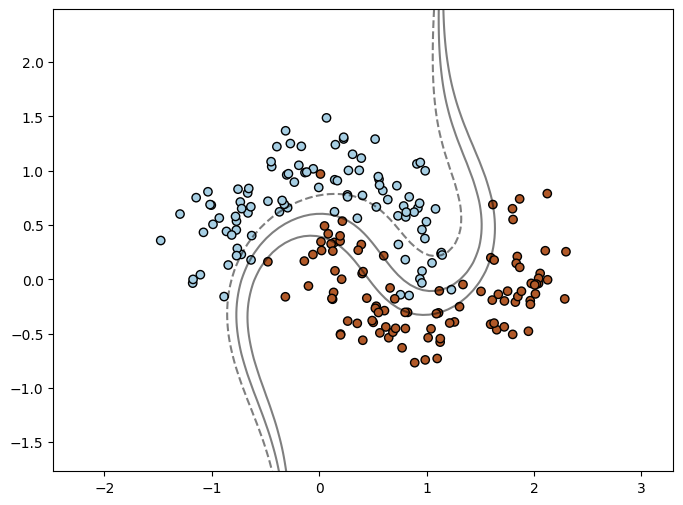

In [91]:
# Set up the plot
plt.figure(figsize=(8, 6))
ax = plt.gca()

# Plot the decision boundary and margins
# Setting response_method="decision_function" allows plotting margins at levels -1 and 1
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="decision_function",
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    ax=ax,
)

# Plot the original data points
ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolors="k")



In [92]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import LinearSVC

# 1. Create the moon data
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

# 2. The "Polynomial" magic happens here
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)), # Creates the curves
    ("scaler", StandardScaler()),                    # SVMs love scaled data
    ("linear_svc", LinearSVC(C=10, loss="hinge"))    # The actual classifier
])

# 3. Train the model
polynomial_svm_clf.fit(X, y)

/usr/local/lib/python3.12/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=10, loss='hinge'))])

In [27]:
import pandas as pd

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [71]:
from sklearn.inspection import DecisionBoundaryDisplay

In [13]:
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, SVC

In [8]:
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures()),
    ("scaler", StandardScaler()),
    ("svm_clf", LinearSVC(C = 10, loss="hinge"))
])

In [9]:
X, y = make_moons(n_samples = 200, noise = 0.2, random_state = 42)

In [10]:
polynomial_svm_clf.fit(X, y)

/home/mike/miniconda3/lib/python3.13/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,steps,"[('poly_features', ...), ('scaler', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,degree,2
,interaction_only,False
,include_bias,True
,order,'C'
,copy,True
,with_mean,True
,with_std,True


In [11]:
def plot_predictions(clf, axes):
    # 1. Create a grid of points (the 'canvas')
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    
    # 2. Flatten the grid so the model can predict it
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X_new).reshape(x0.shape)
    y_decision = clf.decision_function(X_new).reshape(x0.shape)
    
    # 3. Paint the 'decision boundary' (the line) and the 'margins' (the street)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs") # Blue squares
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^") # Green triangles
    plt.axis(axes)
    plt.grid(True)

In [ ]:
# MOVE 1: The Overfitter (High degree, high C)
overfit_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
])
overfit_clf.fit(X, y)

# MOVE 2: The Relaxed Judge (Low degree, low C)
relaxed_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=0.1))
])
relaxed_clf.fit(X, y)

# Let's plot them!
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(overfit_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title("Move 1: Overfitting (High C, High Degree)")

plt.subplot(122)
plot_predictions(relaxed_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.title("Move 2: Generalizing (Low C, Low Degree)")

plt.show()